In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objects as go


In [ ]:
# Load Dataset
data = pd.read_csv('SmartCrop-Dataset.csv')
df = pd.DataFrame(data)

# Explore data
print("Number of Instances and Attributes:", df.shape)
print('\n')
print('Dataset columns:', df.columns)
print('\n')
print('Data types of each columns: ', df.info())


Number of Instances and Attributes: (2200, 8)


Dataset columns: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
Data types of each columns:  None


In [ ]:
# Checking for Duplicates
count_dups = df.duplicated().sum()
print("Number of Duplicates: ", count_dups)
if count_dups >= 1:
    df.drop_duplicates(inplace=True)
    print('Duplicate values removed!')
else:
    print('No Duplicate values')


Number of Duplicates:  0
No Duplicate values


In [ ]:
df.max()


N                     140
P                     145
K                     205
temperature     43.675493
humidity        99.981876
ph               9.935091
rainfall       298.560117
label          watermelon
dtype: object

In [ ]:
df.min()

N                      0
P                      5
K                      5
temperature     8.825675
humidity        14.25804
ph              3.504752
rainfall       20.211267
label              apple
dtype: object

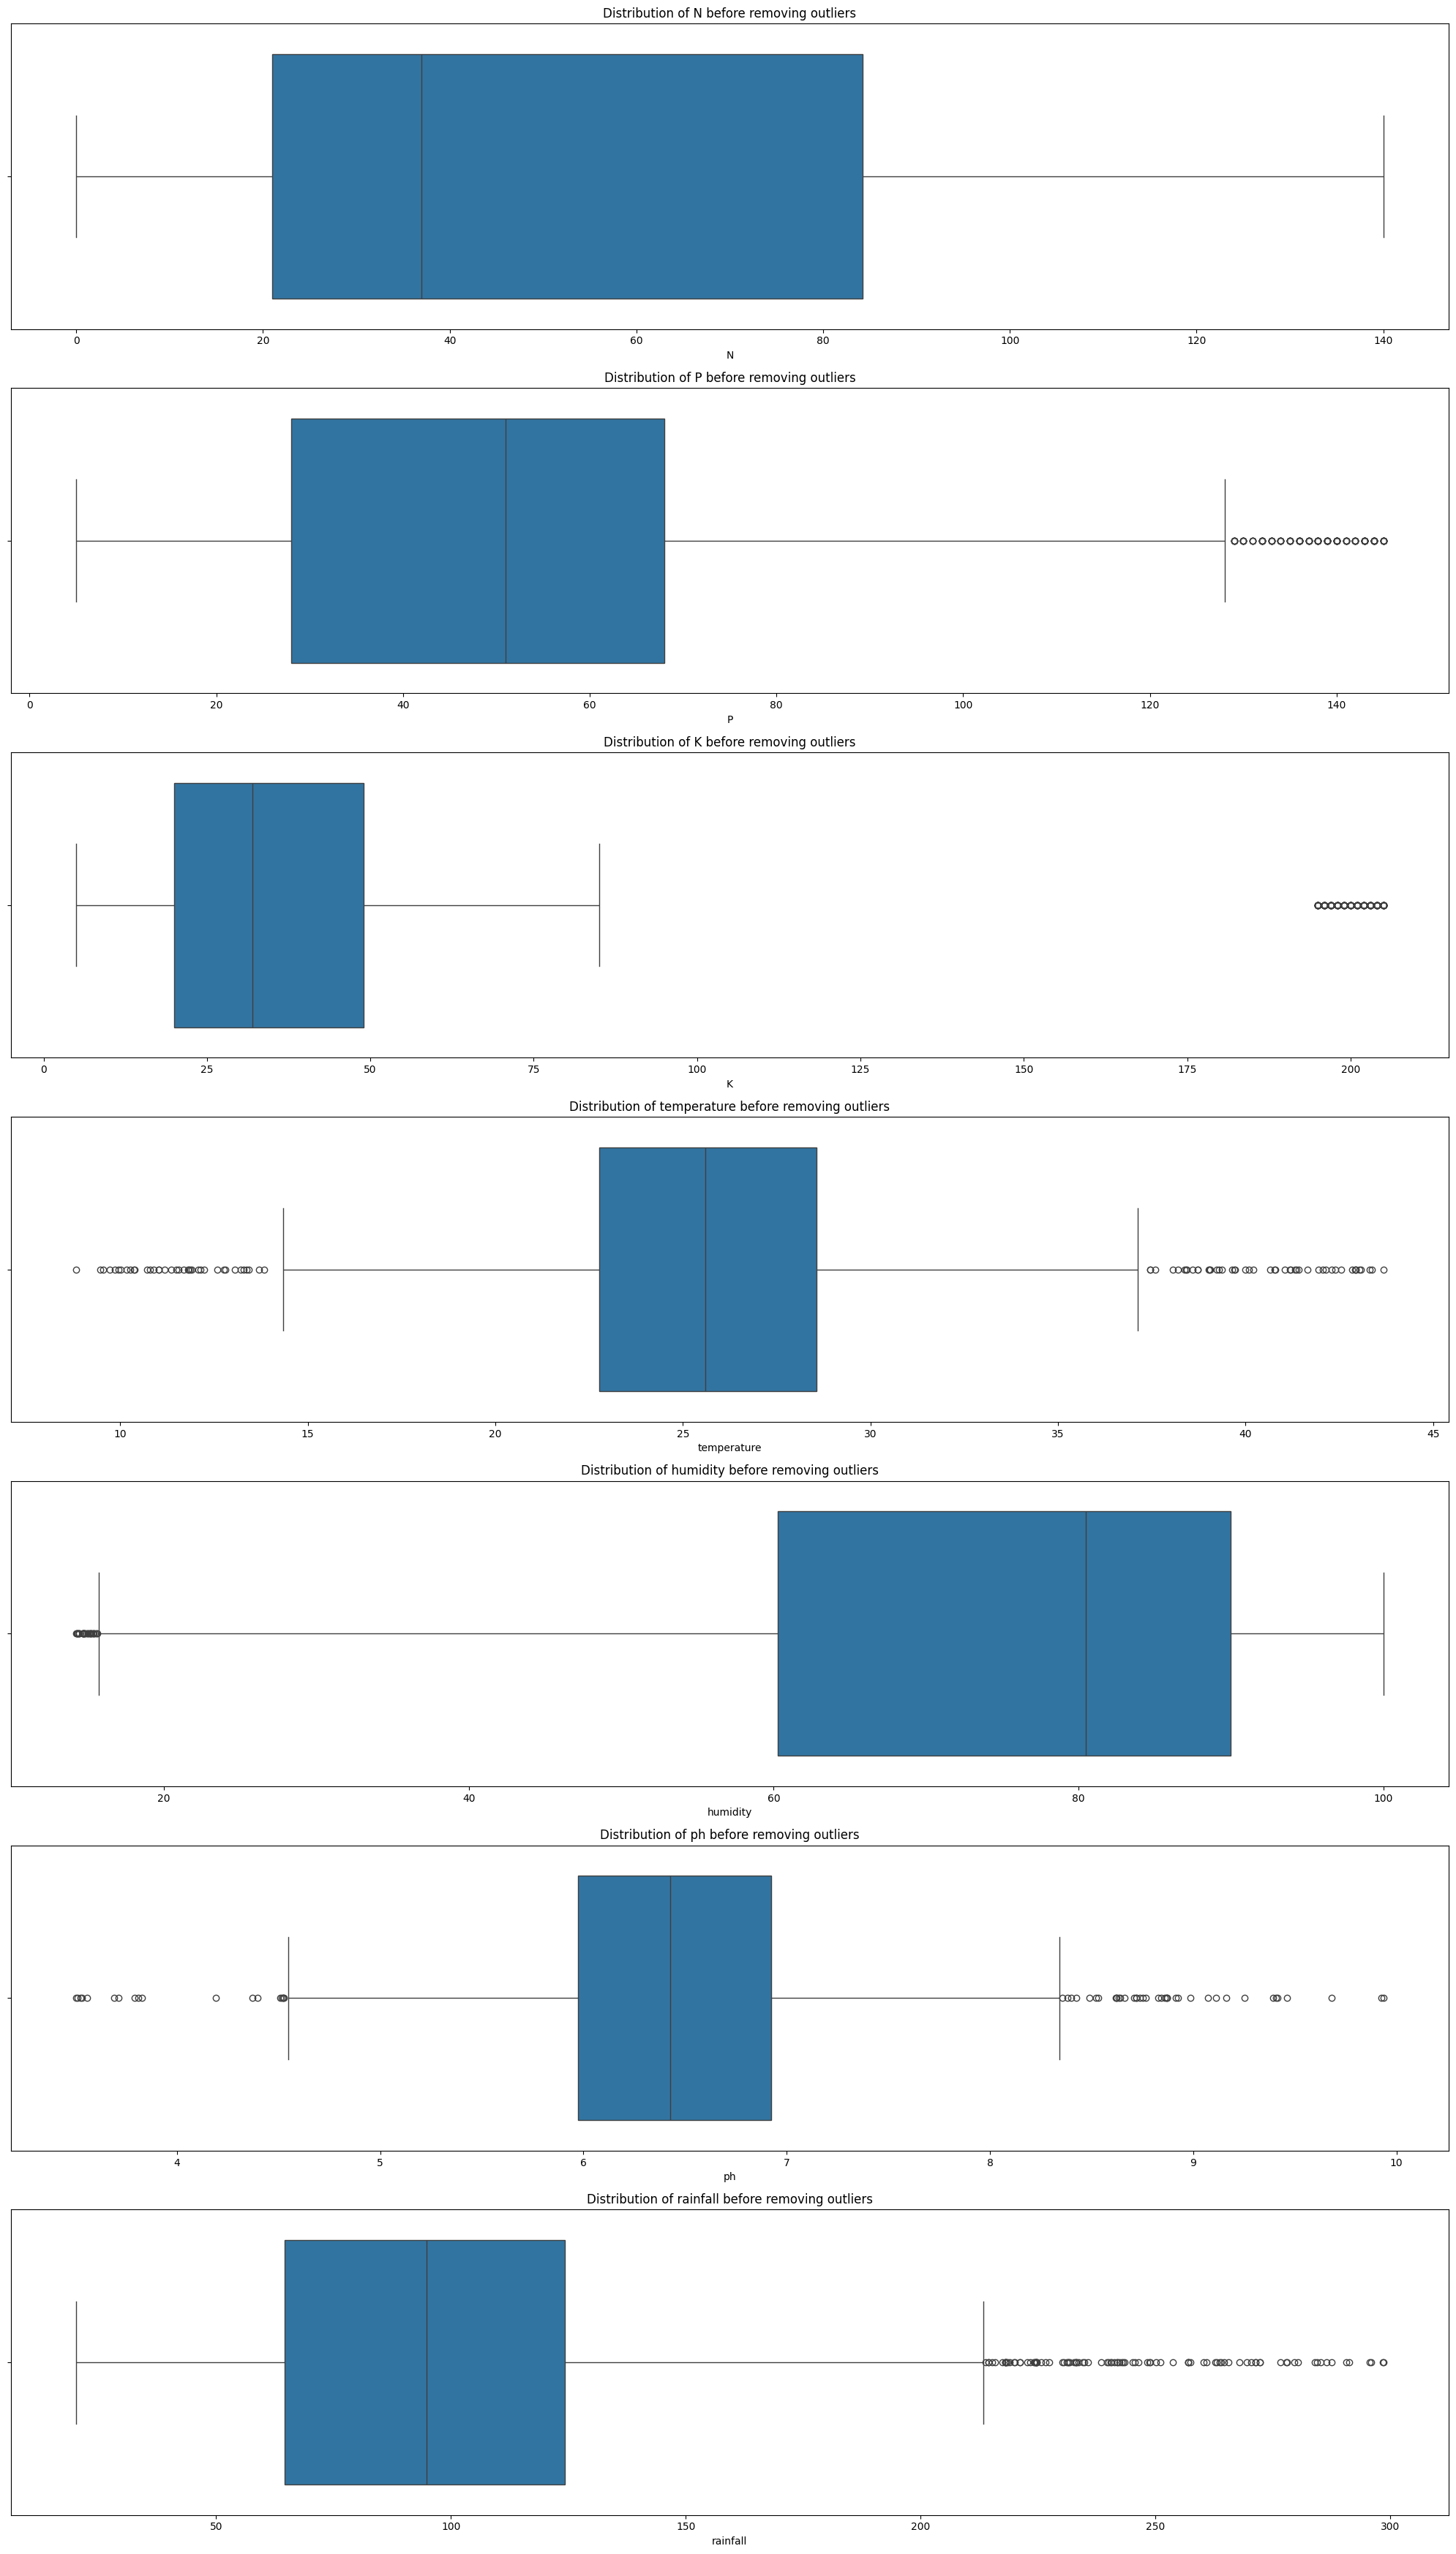

Data without outliers:
        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
13     93  56  36    24.014976  82.056872  6.984354  185.277339    rice
14     94  50  37    25.665852  80.663850  6.948020  209.586971    rice
17     91  35  39    23.793920  80.418180  6.970860  206.261186    rice
20     89  45  36    21.325042  80.474764  6.442475  185.497473    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[1768 rows x 8 columns]


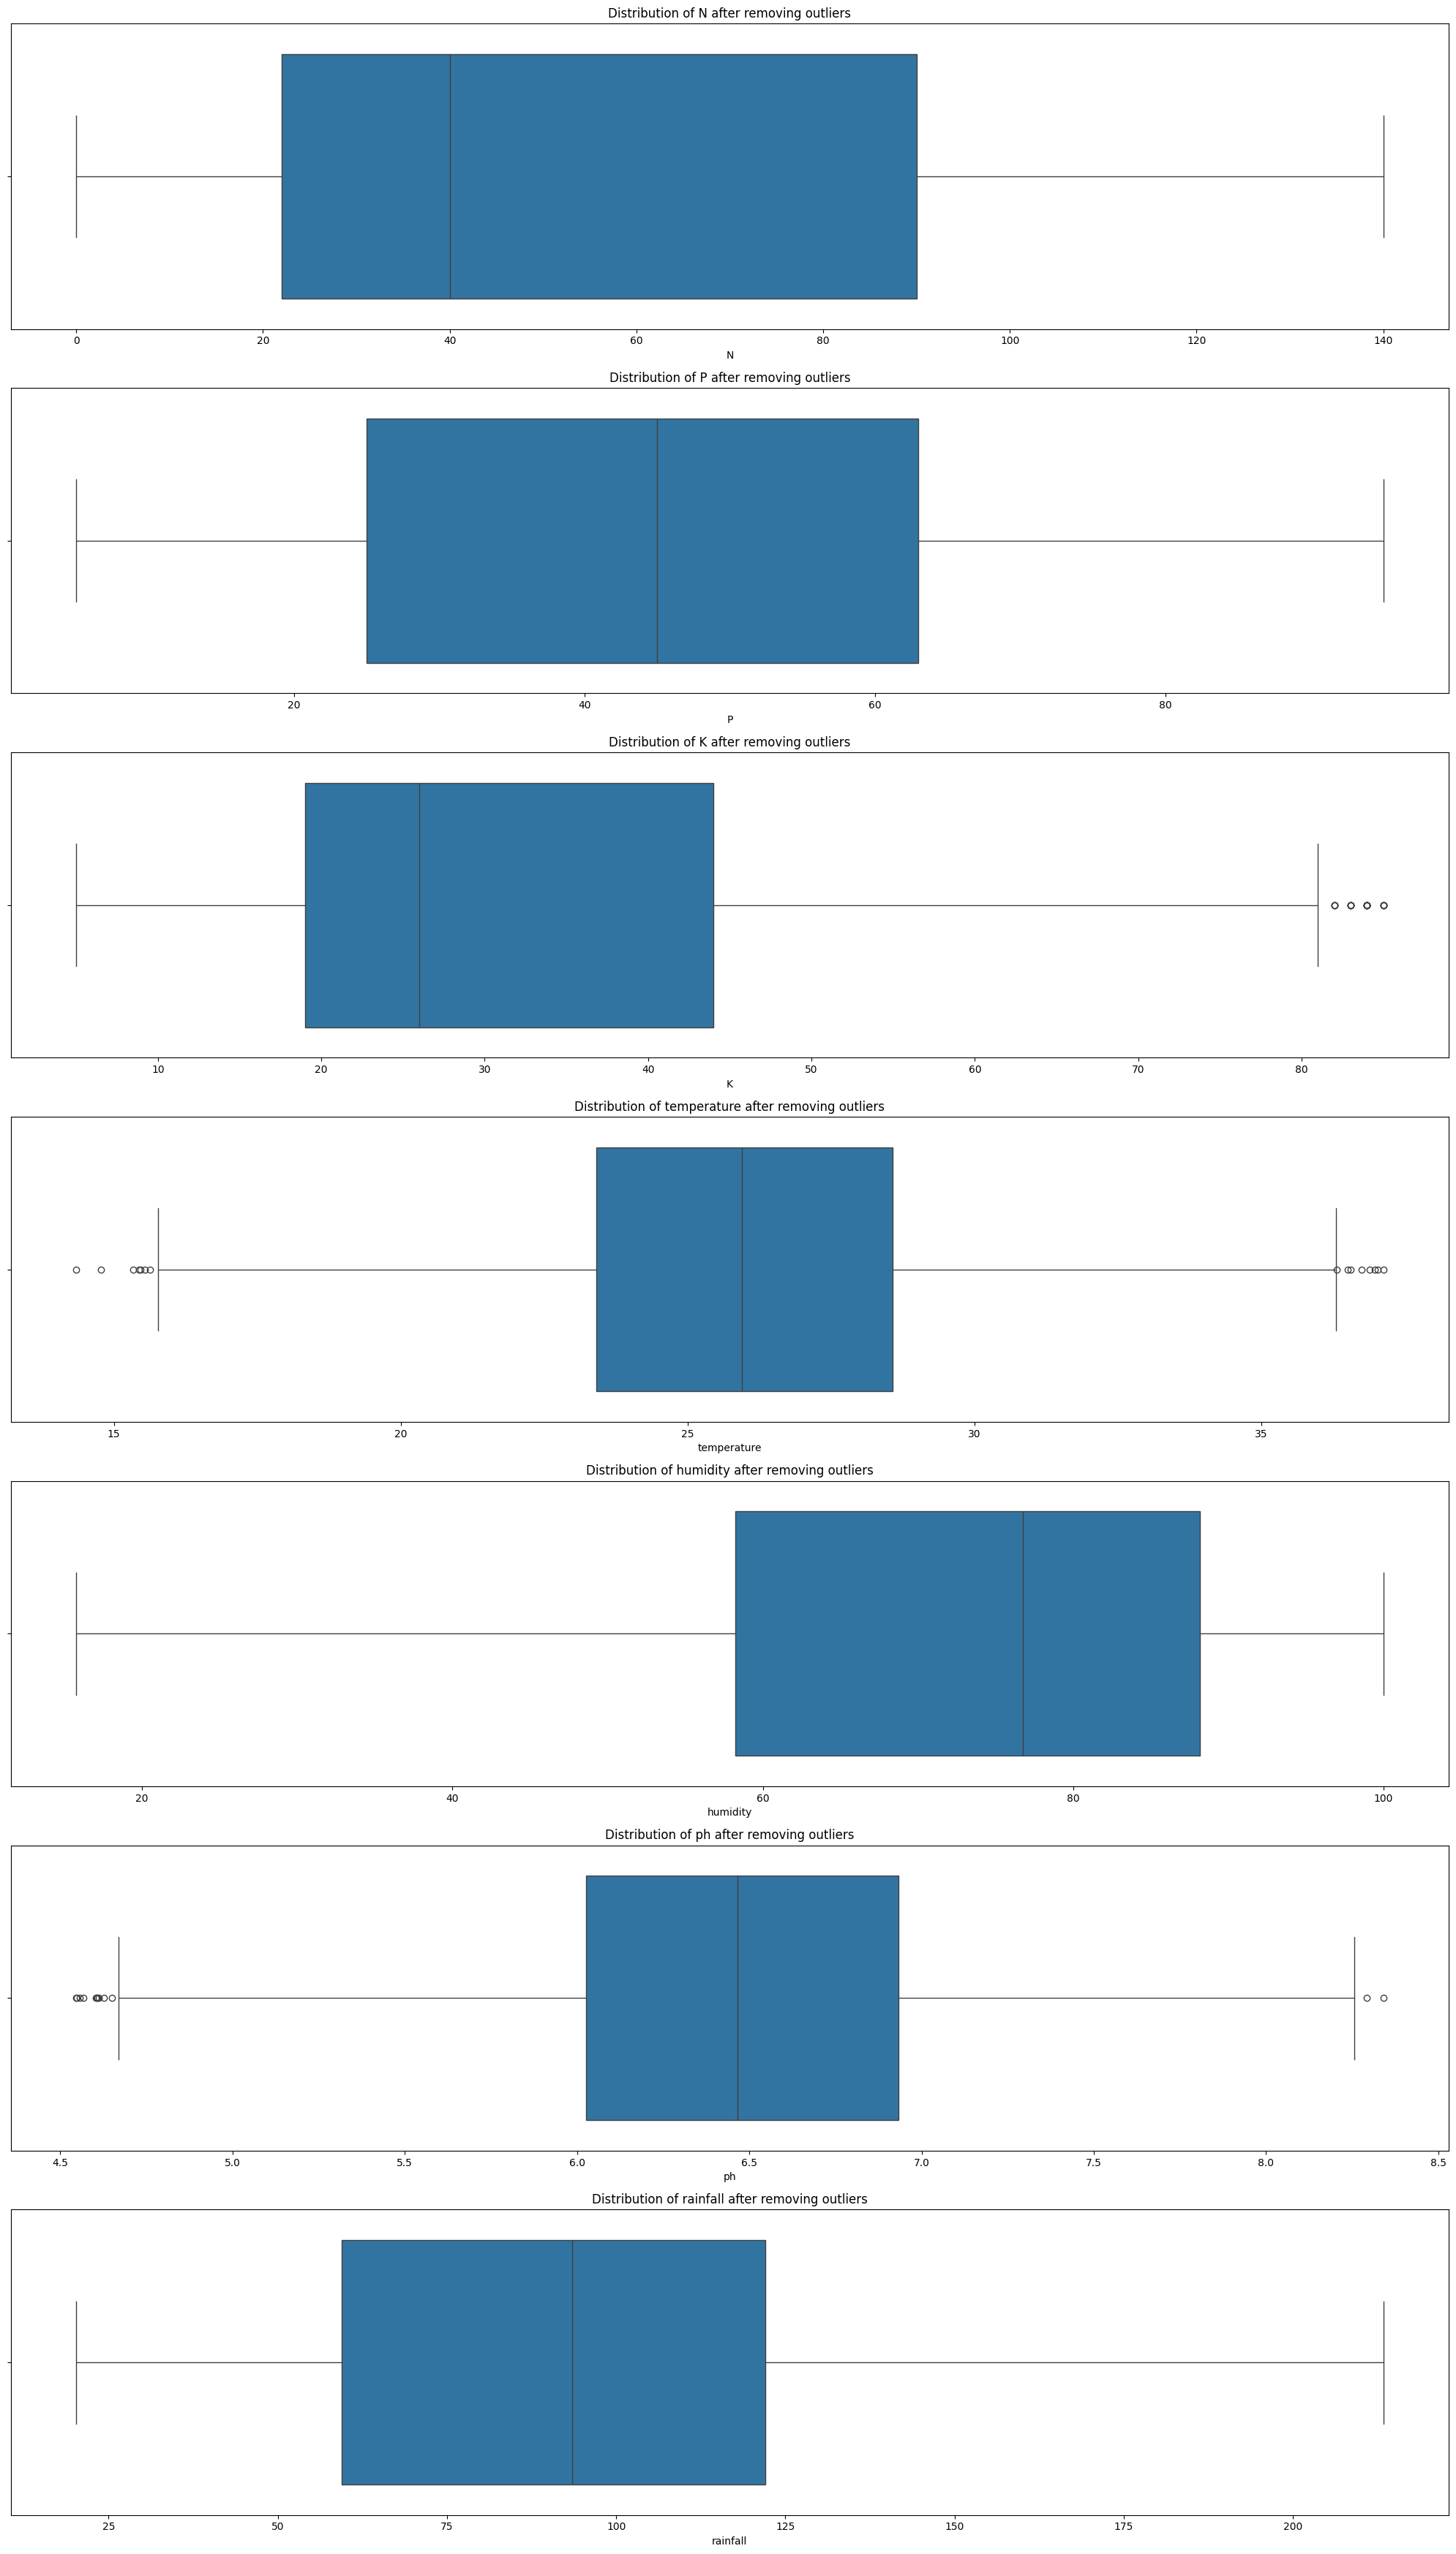

In [ ]:
# Find which columns are numeric
numeric_columns = df.select_dtypes(include=[np.number]).columns  # Select only numeric columns

# Plot distribution of numeric features before outlier removal
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(20, len(numeric_columns) * 5))
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Distribution of {column} before removing outliers')
plt.tight_layout()
plt.show()

# Calculate Q1, Q3, and IQR only for numeric columns
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers using IQR method
df_out = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Data without outliers:")
print(df_out)

# Plot distribution of numeric features after outlier removal
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(20, len(numeric_columns) * 5))
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df_out[column], ax=axes[i])

    axes[i].set_title(f'Distribution of {column} after removing outliers')
plt.tight_layout()
plt.show()


In [ ]:
# Split Data to Training and Validation set
target = 'label'
X = df_out.drop(target, axis=1)
y = df_out[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
# Train RandomForestClassifier to get feature importance
pipeline_rf = make_pipeline(StandardScaler(), RandomForestClassifier())
model_rf = pipeline_rf.fit(X_train, y_train)
importances = model_rf.named_steps['randomforestclassifier'].feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

fig = go.Figure()
fig.add_trace(go.Bar(x=feature_names[indices], y=importances[indices]))
fig.update_layout(title='Feature Importance',
                  xaxis_title='Feature',
                  yaxis_title='Importance')
fig.show()


In [ ]:
#Model training
selected_columns = [0, 1, 2, 3]
X_train_selected = X_train.iloc[:, selected_columns]
X_test_selected = X_test.iloc[:, selected_columns]

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
model = pipeline.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
print(X_train_selected)
print(X_test_selected)
print(y_train)
print(y_pred)


        N   P   K  temperature
2049  100  56  40    26.389054
897     4  59  19    26.250703
635    14  48  21    29.245990
201    23  72  84    19.020613
312    28  80  17    19.622078
...   ...  ..  ..          ...
987    11  10  45    22.630452
1470  115  12  52    27.514922
2085   87  48  38    23.815796
711    57  67  25    32.347440
836    19  72  15    28.836010

[1414 rows x 4 columns]
        N   P   K  temperature
2100   91  21  26    26.333780
822    12  66  20    27.414350
539     9  49  16    30.884827
1310   83  25  53    26.491953
941     5  29  44    21.024329
...   ...  ..  ..          ...
2103  108  24  31    24.128325
705    50  55  16    28.814607
1138    4  40  26    27.582589
1666   16  29  13    32.319444
682     6  47  18    29.161746

[354 rows x 4 columns]
2049           jute
897          lentil
635        mungbean
201        chickpea
312     kidneybeans
           ...     
987     pomegranate
1470      muskmelon
2085           jute
711       blackgram
836    

Training Accuracy Score: 100.0%
Validation Accuracy Score: 85.3%


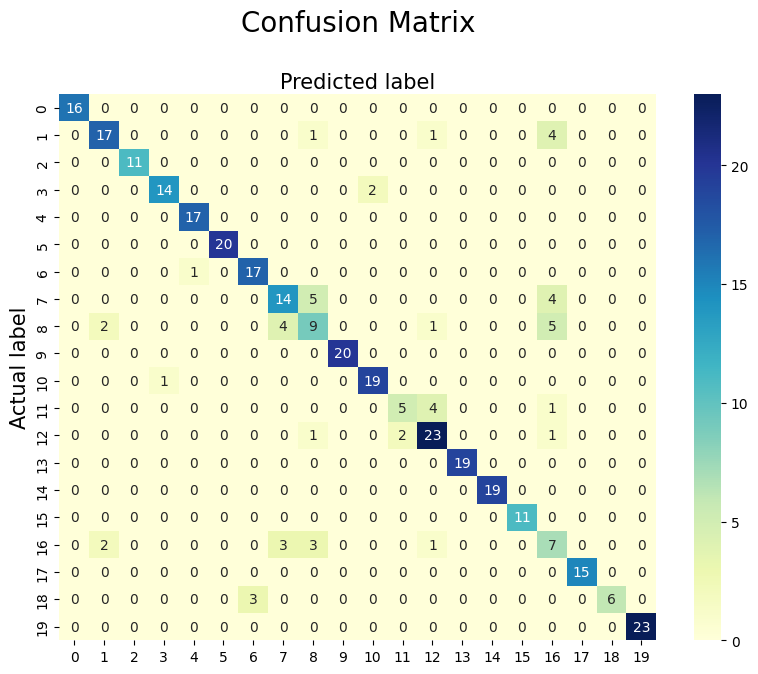

              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        16
   blackgram       0.81      0.74      0.77        23
    chickpea       1.00      1.00      1.00        11
     coconut       0.93      0.88      0.90        16
      coffee       0.94      1.00      0.97        17
      cotton       1.00      1.00      1.00        20
        jute       0.85      0.94      0.89        18
 kidneybeans       0.67      0.61      0.64        23
      lentil       0.47      0.43      0.45        21
       maize       1.00      1.00      1.00        20
       mango       0.90      0.95      0.93        20
   mothbeans       0.71      0.50      0.59        10
    mungbean       0.77      0.85      0.81        27
   muskmelon       1.00      1.00      1.00        19
      orange       1.00      1.00      1.00        19
      papaya       1.00      1.00      1.00        11
  pigeonpeas       0.32      0.44      0.37        16
 pomegranate       1.00    

In [ ]:
# Performance Measure
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Training Accuracy Score: {model.score(X_train_selected, y_train) * 100:.1f}%")
print(f"Validation Accuracy Score: {model.score(X_test_selected, y_test) * 100:.1f}%")
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', fontsize=20, y=1.1)
plt.ylabel('Actual label', fontsize=15)
plt.xlabel('Predicted label', fontsize=15)
plt.show()
print(classification_report(y_test, y_pred))


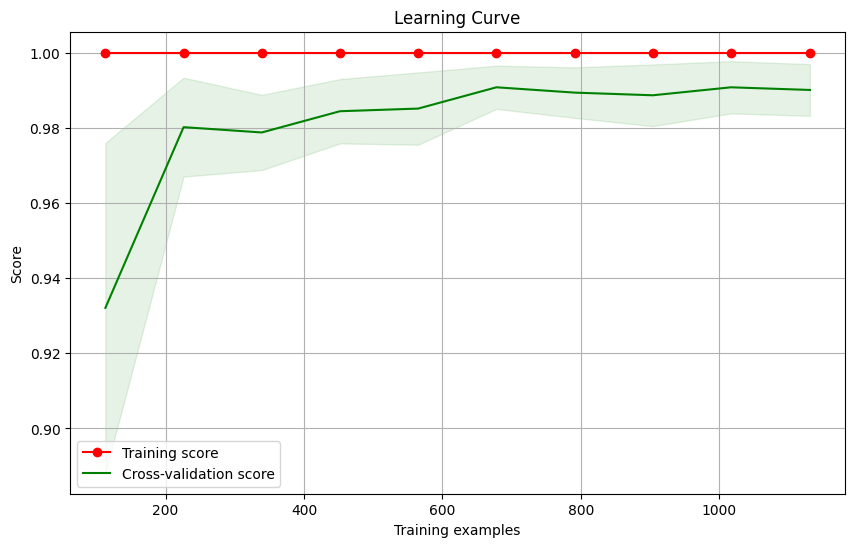

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, color="g", label="Cross-validation score")

plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid()
plt.show()
